# Player Statistics for Chelsea FC's 2018-19 Season
## Includes statistics from the Premier League, FA Cup, and Europa League Season 
All statistics are from Sport Monks.

Sadly, the graphs are little wonky because I made them with Jupyter Notebook where they are interactive and since you are viewing them on GitHub they are no longer interactive. Sorry about that!

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

A lot of API calls, data cleaning and data combining occured to create this csv file. The primary reason it was created was to prevent having to spam the API everytime I wanted to rerun everything

In [47]:
f = open("dataframe.csv", "r")
df = pd.read_csv(f)

To limit the amount of outliers remove players who have not played more than 5 times

In [48]:
appearences = df['appearences'] > 5
df = df[appearences]

Creating a minutes per goal and minutes per assist column in the dataframe

In [49]:
mingoal = pd.Series(df['minutes']/df['goals'])
minassist = pd.Series(df['minutes']/df['assists'])
df['min_goal'] = mingoal
df['min_assist'] = minassist

Ensuring no divide by zero cases occur and removing any outlier goal scorers or assisters

In [50]:
goals = df['goals'] > 0
assists = df['assists'] > 0
goalmin = df['min_goal'] < 850
assistmin = df['min_assist'] < 850
df_mins = df[goals & assists & assistmin & goalmin]

Preparing the lists to be plotted.
Also preparing the plot itself

In [51]:
mingoal = df_mins.min_goal
minassist = df_mins.min_assist
name = df_mins.name

Below will generate the plot.

The farther lower and to the left the player is the more active threat they are in front of goal

Since three players are so close together the graph has been zoomed in

<IPython.core.display.Javascript object>


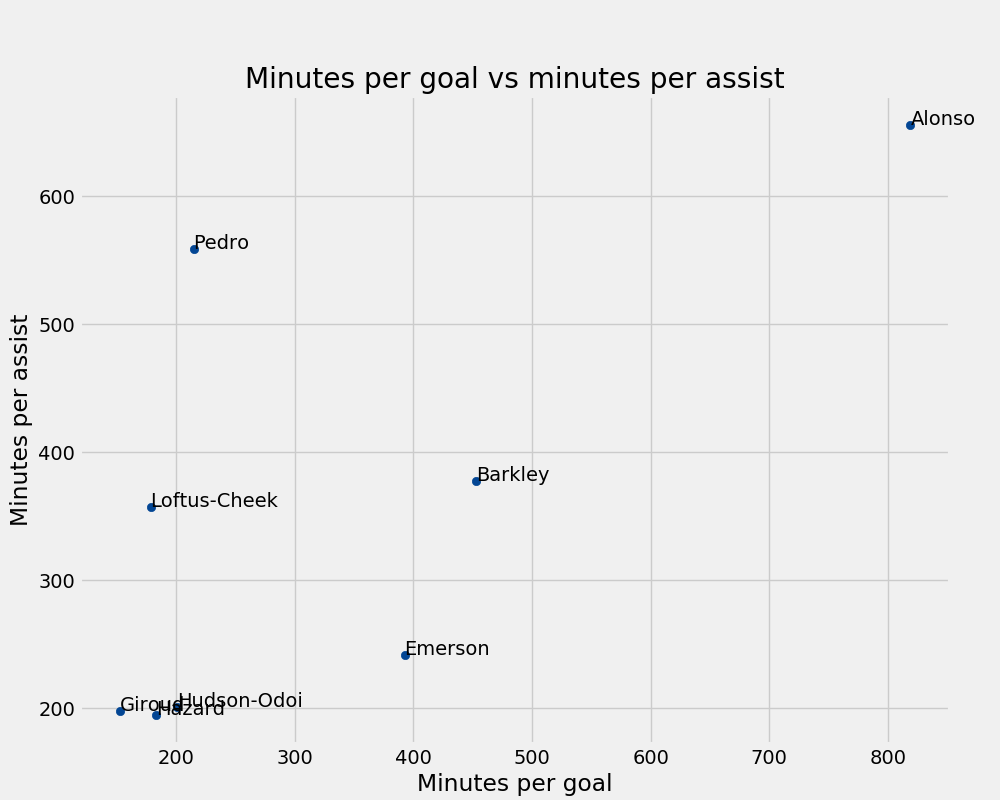

In [52]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.scatter(mingoal, minassist, c='#034694')
plt.title('Minutes per goal vs minutes per assist')
plt.xlabel('Minutes per goal')
plt.ylabel('Minutes per assist')
i = 0
while i < len(name):
    plt.annotate(name.iloc[i], (mingoal.iloc[i], minassist.iloc[i]))
    i = i +1

Removing anyone who has not attempted at least 5 dribbles. Similar to above to prevent outliers from showing up.

In [53]:
dribbles = df['dribbles_attempts'] > 5
df_dribble = df[dribbles]
dribblesuccess = pd.Series(df_dribble['dribbles_success']/df['dribbles_attempts']*100)
df['dribble_success'] = dribblesuccess

In [54]:
dribbles = df.dribbles_attempts
dribblesuccess = df.dribble_success
name = df.name

The farther right the more successful each dribble attempt

The higher the more dribble attempts taken

<IPython.core.display.Javascript object>


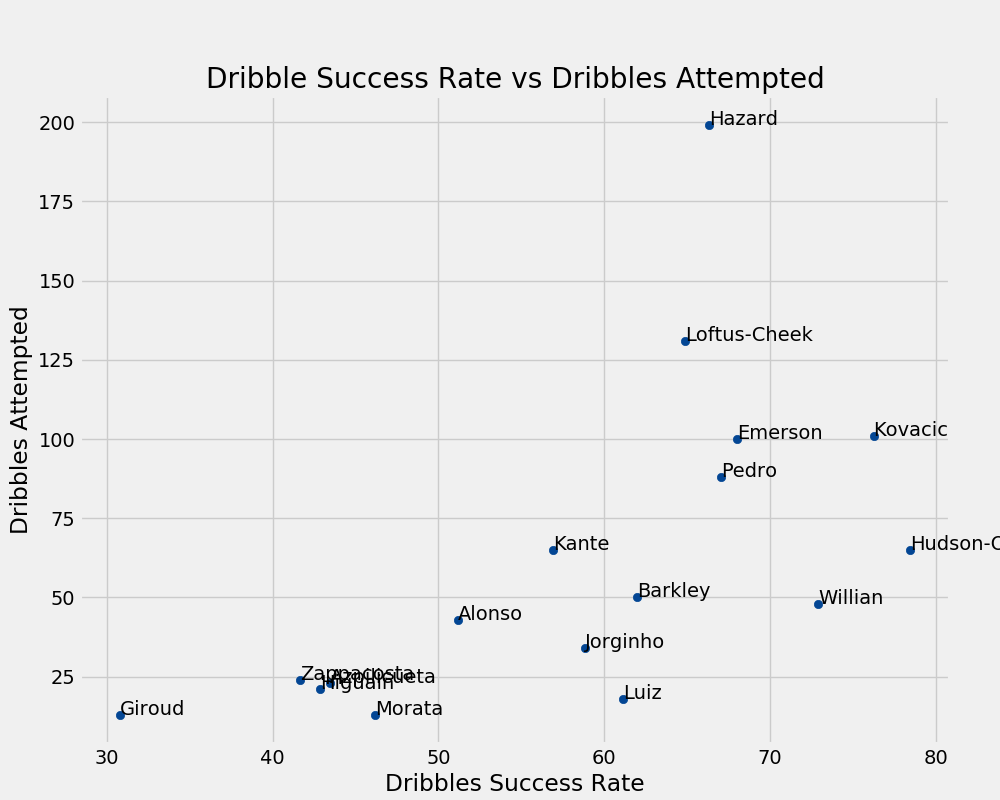

In [55]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.scatter(dribblesuccess, dribbles, c='#034694')
plt.title('Dribble Success Rate vs Dribbles Attempted')
plt.xlabel('Dribbles Success Rate')
plt.ylabel('Dribbles Attempted')
i = 0
while i < len(name):
    plt.annotate(name.iloc[i], (dribblesuccess.iloc[i], dribbles.iloc[i]))
    i = i +1

In [56]:
interceptions_check = df['interceptions'] > 5
tackles_check = df['tackles'] > 5
df_defense = df[interceptions_check & tackles_check]
interceptions = df_defense.interceptions
tackles = df_defense.tackles
name = df_defense.name

An interesting note to see from this graph is that midfielders and fullbacks make more tackles and interceptions than centerbacks

<IPython.core.display.Javascript object>


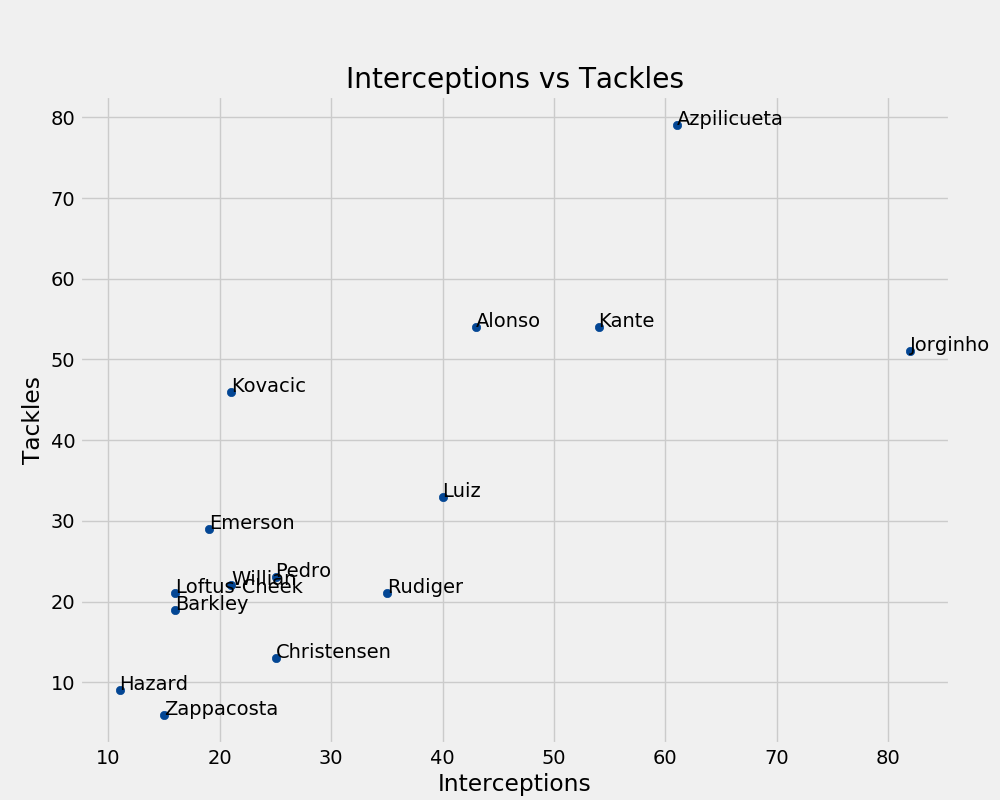

In [57]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.scatter(interceptions, tackles, c='#034694')
plt.title('Interceptions vs Tackles')
plt.xlabel('Interceptions')
plt.ylabel('Tackles')
i = 0
while i < len(name):
    plt.annotate(name.iloc[i], (interceptions.iloc[i], tackles.iloc[i]))
    i = i +1

In [58]:
df_yellow = df.nlargest(10, 'yellowcards')
yellow = df_yellow.yellowcards
name = df_yellow.name

Four yellowcards for a striker (Morata) is quite poor

<IPython.core.display.Javascript object>


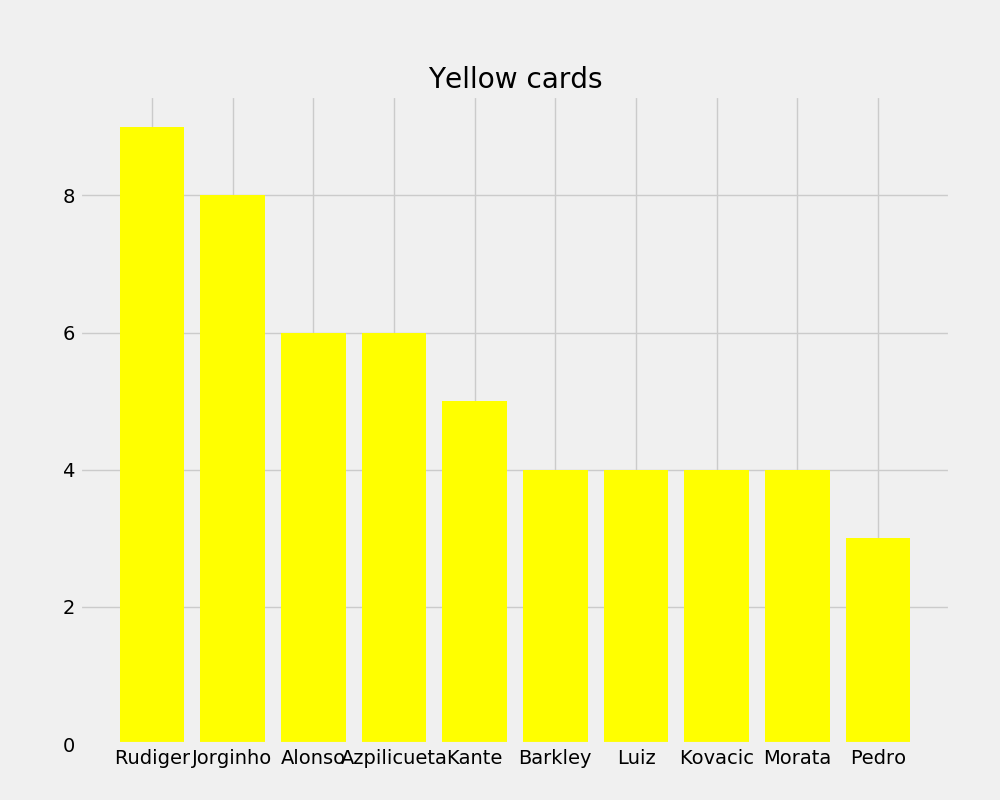

([<matplotlib.axis.XTick at 0x1b52d89d5c8>,
 <a list of 10 Text xticklabel objects>)

In [59]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
x = np.linspace(1, 10, num=10)
plt.bar(x, yellow, align='center', color='#FFFF00')
plt.title("Yellow cards")
plt.xticks(x, name)